In [43]:
import os
import json
import glob 
import numpy as np
import pandas as pd
from os.path import basename, dirname, join, exists

def load_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

def find_anomalies(data, threshold=0.01):
    anomalies = []
    for i in range(1, len(data)):
        if data[i] > threshold:
            anomalies.append(i)

    # re-try if threshold doesn't work
    if len(anomalies) == 0:
        head = 5
        data = data[head:]
        anomalies = [np.argmax(data) + head]

    # merge continuous anomalies if the distance are shorter than 5 steps
    merged_anomalies = [] if len(anomalies) == 0 else [anomalies[0]]
    for i in range(1, len(anomalies)):
        if anomalies[i] - anomalies[i-1] > 5:
            merged_anomalies.append(anomalies[i])
    
    return merged_anomalies, anomalies

In [44]:
# faults are injected at 360

for bocpd_output_path in glob.glob("./bocpd/*.json"):
    service, metric, case_idx = basename(bocpd_output_path).split(".")[0].split("_")
    print(service, metric, case_idx)
    
    data = load_json(bocpd_output_path)
    
    print(find_anomalies(data))   

cartservice cpu 1
([390], [390, 391, 392])
cartservice cpu 2
([390], [390, 391])
cartservice cpu 3
([393], [393, 394, 395, 396])
cartservice cpu 4
([393], [393, 394, 395])
cartservice cpu 5
([382], [382, 384])
cartservice delay 1
([392], [392])
cartservice delay 2
([394], [394])
cartservice delay 3
([395], [395])
cartservice delay 4
([391], [391])
cartservice delay 5
([399], [399])
cartservice loss 1
([82], [82, 83])
cartservice loss 2
([320], [320, 321])
cartservice loss 3
([384], [384])
cartservice loss 4
([416], [416])
cartservice loss 5
([386], [386, 387])
cartservice mem 1
([377, 421], [377, 378, 379, 382, 421, 422])
cartservice mem 2
([386, 421], [386, 421, 422])
cartservice mem 3
([386, 423], [386, 387, 423, 426])
cartservice mem 4
([420], [420, 421, 424])
cartservice mem 5
([39, 82, 383], [39, 82, 83, 383])
checkoutservice cpu 1
([307], [307])
checkoutservice cpu 2
([341], [341])
checkoutservice cpu 3
([410], [410])
checkoutservice cpu 4
([403], [403])
checkoutservice cpu 5
([4

0.9799993482263842


<Axes: >

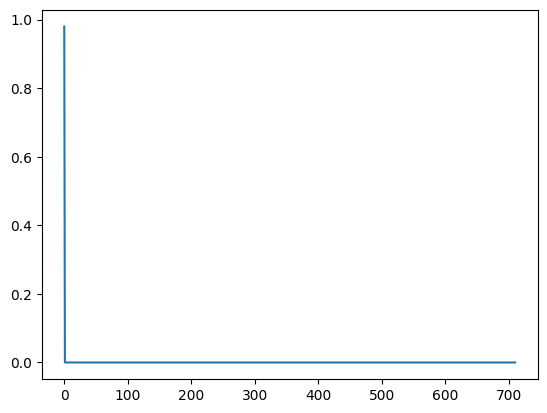

In [30]:
data = load_json("./bocpd/cartservice_loss_3.json")
print(max(data))
pd.Series(data).plot()